# KDv Eqaution

The KdV equation is a nonlinear, dispersive partial differential equation for a function $\phi$  of two dimensionless real variables, $x$ and $t$ which are proportional to space and time respectively


$${\displaystyle \partial _{t}\phi +\partial _{x}^{3}\phi -6\,\phi \,\partial _{x}\phi =0\,}$$



with $∂x$ and $∂t$ denoting partial derivatives with respect to $x$ and $t$.

The constant 6 in front of the last term is conventional but of no great significance:

multiplying $t$, $x$, and $\phi$  by constants can be used to make the coefficients of any of the three terms equal to any given non-zero constants.

the solution is

$${\displaystyle \phi (x,t)=-{\frac {1}{2}}\,c\,\operatorname {sech} ^{2}\left[{{\sqrt {c}} \over 2}(x-c\,t-a)\right]}$$
where $sech$ stands for the hyperbolic secant and $a$ is an arbitrary constant.

This describes a right-moving soliton.

## Initial condition
$$\phi(x, t=t_{min})=-{\frac {1}{2}}\,c\,\operatorname {sech} ^{2}\left[{{\sqrt {c}} \over 2}(x-c\,t_{min}-a)\right]$$
## Boundary condition
1. Dirichlet Boundary Condition
2. Neuman Boundary Condition

## Integral of motion
The integrals of motion are:

the mass $$\int \phi \,{\text{d}}x$$
the momentum $$\int \phi ^{2}\,{\text{d}}x$$
the energy $${\displaystyle \int \left[2\phi ^{3}-\left(\partial _{x}\phi \right)^{2}\right]\,{\text{d}}x.}$$

## any other conserve quantity used as loss function

PINN to solve PDE

In [32]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [33]:
print(np.__version__)

2.0.2


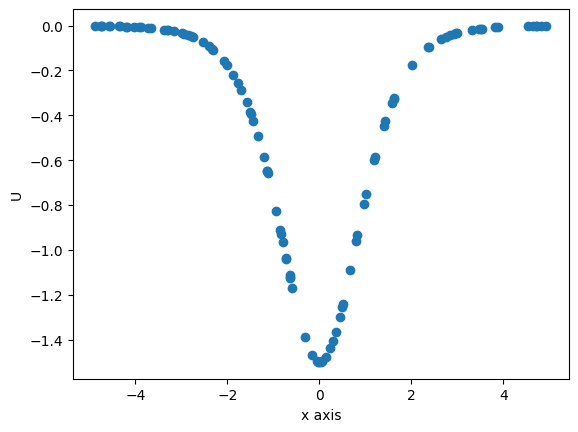

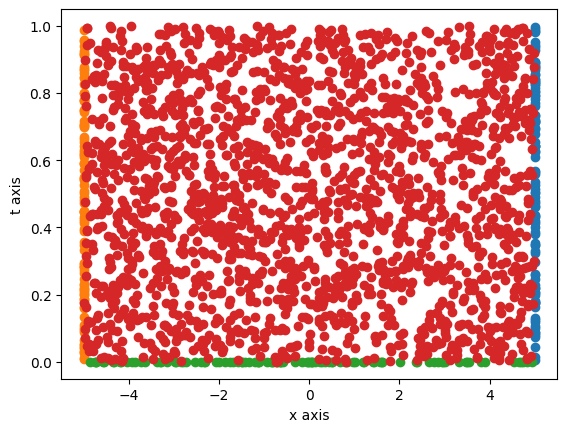

In [34]:
x_min = -5
x_max = 5
t_min = 0
t_max = 1

N_0 = 100
N_b = 100
N_r = 2000
np.random.seed(2)

#initial at U(x, t=0)
x_0 = np.random.uniform(low=x_min, high=x_max, size=(N_0, 1))
t_0 = np.ones((N_0, 1), dtype=np.float64)*t_min
c = 3
U_0 = -0.5*c* 1/(np.cosh( 0.5*np.sqrt(c)*(x_0 -c*t_min) )**2) # initial condition
#U_0 = 0.5*c* 1/(np.cosh( 0.5*np.sqrt(c)*(x_0 -c*t_min)**2))

t_b1 = np.random.uniform(low=t_min, high=t_max, size=(N_b, 1))
x_b1 = np.ones((N_b, 1), dtype=np.float64)*x_min
U_b1 = np.ones((N_b, 1), dtype=np.float64)*0

t_b2 = np.random.uniform(low=t_min, high=t_max, size=(N_b, 1))
x_b2 = np.ones((N_b, 1), dtype=np.float64)*x_max
U_b2 = np.ones((N_b, 1), dtype=np.float64)*0


x_c = np.random.uniform(low=x_min, high=x_max, size=(N_r, 1))
t_c = np.random.uniform(low=t_min, high=t_max, size=(N_r, 1))



plt.scatter(x_0, U_0)
plt.xlabel("x axis")
plt.ylabel("U")
plt.show()
plt.scatter(x_b2, t_b2)
plt.scatter(x_b1, t_b1)
plt.scatter(x_0, t_0)
plt.scatter(x_c, t_c)
plt.xlabel("x axis")
plt.ylabel("t axis")
plt.show()

#Neural Network

## We consider Neural Network as our solution u(x,t)

In [35]:
"""
#inputs = 2 (x,t)
and #outputs = 1 (u)

We can add as many hidden layers as we want with as many neurons.
More complex the network, the more prepared it is to find complex solutions, but it also requires more data.

Let us create this network:
5 hidden layer with 10 neurons each.
one input layer(2,5)
one output layer(5,1)
"""

class Neural_network(nn.Module):
  def __init__(self):
    super(Neural_network, self).__init__()
    self.input_layer = nn.Linear(2,20)
    self.hidden_layer1 = nn.Linear(20,20)
    self.hidden_layer2 = nn.Linear(20,20)
    self.hidden_layer3 = nn.Linear(20,20)
    self.hidden_layer4 = nn.Linear(20,20)
    self.hidden_layer5 = nn.Linear(20,20)
    self.hidden_layer6 = nn.Linear(20,20)
    self.hidden_layer7 = nn.Linear(20,20)
    self.hidden_layer8 = nn.Linear(20,20)
    self.output_layer = nn.Linear(20,1)

  def forward(self, x):
    #lb = torch.from_numpy(np.array([-1,-1])).to(device)
    #ub = torch.from_numpy(np.array([1,1])).to(device)
    #x = (x - lb)/(ub - lb)
    x = self.input_layer(x)
    x = torch.tanh(x)
    x = torch.tanh(self.hidden_layer1(x))
    x = torch.tanh(self.hidden_layer2(x))
    x = torch.tanh(self.hidden_layer3(x))
    x = torch.tanh(self.hidden_layer4(x))
    x = torch.tanh(self.hidden_layer5(x))
    #x = torch.tanh(self.hidden_layer6(x))
    #x = torch.tanh(self.hidden_layer7(x))
    #x = torch.tanh(self.hidden_layer8(x))
    x = self.output_layer(x)
    return x

In [36]:
Net = Neural_network()
Net = Net.to(device)
loss_fu = nn.MSELoss()
optim = torch.optim.Adam(Net.parameters(), lr=0.0001)

In [46]:
import torch
import numpy as np

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert NumPy arrays to PyTorch tensors (no need for Variable in PyTorch >= 0.4.0)
x_01 = torch.from_numpy(x_0).float().to(device)
t_01 = torch.from_numpy(t_0).float().to(device)
U_01 = torch.from_numpy(U_0).float().to(device)
X_0 = torch.cat([x_01, t_01], dim=1)  # Use dim=1 for column-wise concat

# BC1
x_b11 = torch.from_numpy(x_b1).float().requires_grad_(True).to(device)
t_b11 = torch.from_numpy(t_b1).float().to(device)
U_b11 = torch.from_numpy(U_b1).float().to(device)
X_b1 = torch.cat([x_b11, t_b11], dim=1)

# BC2
x_b21 = torch.from_numpy(x_b2).float().requires_grad_(True).to(device)
t_b21 = torch.from_numpy(t_b2).float().to(device)
U_b21 = torch.from_numpy(U_b2).float().to(device)
X_b2 = torch.cat([x_b21, t_b21], dim=1)

RuntimeError: Numpy is not available

# PDE Loss

In [ ]:
def pde(x, t, Net):
  x_1 = torch.autograd.Variable( torch.from_numpy(x).float(), requires_grad=True).to(device)
  t_1 = torch.autograd.Variable( torch.from_numpy(t).float(), requires_grad=True).to(device)
  X = torch.cat([x_1, t_1], axis=1)

  u = Net.forward(X)

  u_x = torch.autograd.grad(u.sum(), x_1, create_graph=True)[0]
  u_t = torch.autograd.grad(u.sum(), t_1, create_graph=True)[0]
  u_xx = torch.autograd.grad(u_x.sum(), x_1, create_graph=True)[0]
  u_xxx = torch.autograd.grad(u_xx.sum(), x_1, create_graph=True)[0]
  pde1 = u_t + u_xxx - 6*u*u_x
  return pde1

#Loss

In [ ]:
#LBFGS
"""
optim_LBFGGS = torch.optim.LBFGS(Net.parameters(), lr=0.01)
def closure():
  optim_LBFGGS.zero_grad()
  u_pred_0 = Net.forward(X_0)     #forward pass
  Loss_initial = loss_fu(u_pred_0, U_01 )    # loss of initial

  u_pred_b1 = Net.forward(X_b1)
  Loss_b1 = loss_fu(u_pred_b1, U_b11)

  u_pred_b2 = Net.forward(X_b2)
  Loss_b2 = loss_fu(u_pred_b2, U_b21)

  pdee = pde(x_c, t_c, Net)                # pde losss
  Loss_pde = torch.linalg.norm(pdee)

  total_loss = Loss_initial + Loss_pde + Loss_b1 + Loss_b2      # total loss

  total_loss.backward()
  #if epoch%1000==0:
   #   print(f'epoch:{epoch}, loss:{total_loss.item():.4f}')
  return total_loss

for epoch in range(10000):
  optim_LBFGGS.step(closure)
"""


"\noptim_LBFGGS = torch.optim.LBFGS(Net.parameters(), lr=0.01)\ndef closure():\n  optim_LBFGGS.zero_grad()\n  u_pred_0 = Net.forward(X_0)     #forward pass\n  Loss_initial = loss_fu(u_pred_0, U_01 )    # loss of initial\n\n  u_pred_b1 = Net.forward(X_b1)\n  Loss_b1 = loss_fu(u_pred_b1, U_b11)\n\n  u_pred_b2 = Net.forward(X_b2)\n  Loss_b2 = loss_fu(u_pred_b2, U_b21)\n  \n  pdee = pde(x_c, t_c, Net)                # pde losss\n  Loss_pde = torch.linalg.norm(pdee)\n  \n  total_loss = Loss_initial + Loss_pde + Loss_b1 + Loss_b2      # total loss\n  \n  total_loss.backward()\n  #if epoch%1000==0:\n   #   print(f'epoch:{epoch}, loss:{total_loss.item():.4f}')\n  return total_loss\n\nfor epoch in range(10000):\n  optim_LBFGGS.step(closure)\n"

In [ ]:
number_of_epoch =10000
looss=[]
for epoch in range(number_of_epoch):
  optim.zero_grad()       # make the gradient zero

  u_pred_0 = Net.forward(X_0)     #forward pass
  Loss_initial = loss_fu(u_pred_0, U_01 )    # loss of initial

  u_pred_b1 = Net.forward(X_b1)
  Loss_b1 = loss_fu(u_pred_b1, U_b11)

  u_pred_b2 = Net.forward(X_b2)
  Loss_b2 = loss_fu(u_pred_b2, U_b21)

  U_b1_derivative = torch.autograd.grad(u_pred_b1.sum(), x_b11, create_graph=True)[0]
  U_b2_derivative = torch.autograd.grad(u_pred_b2.sum(), x_b21, create_graph=True)[0]
  loss_b_deriv1 = loss_fu(U_b1_derivative, U_b21)
  loss_b_deriv2 = loss_fu(U_b2_derivative, U_b21)

  U_b1_derivative_x = torch.autograd.grad(U_b1_derivative.sum(), x_b11, create_graph=True)[0]
  U_b2_derivative_x = torch.autograd.grad(U_b2_derivative.sum(), x_b21, create_graph=True)[0]
  loss_b_deriv1_x = loss_fu(U_b1_derivative_x, U_b21)
  loss_b_deriv2_x = loss_fu(U_b2_derivative_x, U_b21)




  pdee = pde(x_c, t_c, Net)                # pde losss
  Loss_pde = torch.linalg.norm(pdee)

  total_loss = Loss_initial + 0.01*Loss_pde + Loss_b1 + Loss_b2 + loss_b_deriv1 + loss_b_deriv2 + loss_b_deriv1_x + loss_b_deriv2_x      # total loss

  total_loss.backward()    # computing gradients using backward propagation  dL/dw
  optim.step()             # This is equivalent to : Weight_new = weight_old - learing_rate * derivative of Loss w.r.t weight

  looss.append(total_loss.item())
  with torch.autograd.no_grad():
    if epoch%100==0:
      print(f'epoch:{epoch}, loss:{total_loss.item():.8f}')
plt.plot(looss)

NameError: name 'X_0' is not defined

## loss curve
## total time need to train

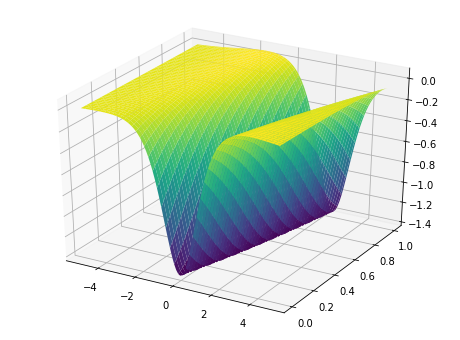

In [ ]:
#plot
N =100
x_space = np.linspace(x_min, x_max, N)
t_space = np.linspace(t_min, t_max, N)
XX, TT = np.meshgrid(x_space, t_space)

X = np.hstack((XX.flatten()[:, None], TT.flatten()[:, None]))
X_tensor = torch.from_numpy(X).float().to(device)
U_pred = Net.forward(X_tensor).cpu().detach().numpy().reshape(N, N) # if use GPU
#U_pred = Net.forward(X_tensor).detach().numpy().reshape(N, N)

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

ax.plot_surface(XX, TT, U_pred, cmap="viridis")
plt.show()

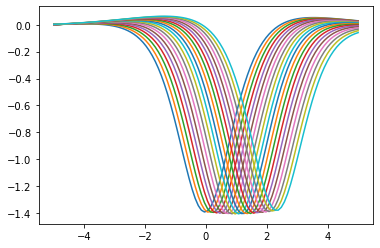

In [ ]:
for k in range(0,N, 5):
  plt.plot(x_space, U_pred[k, :])

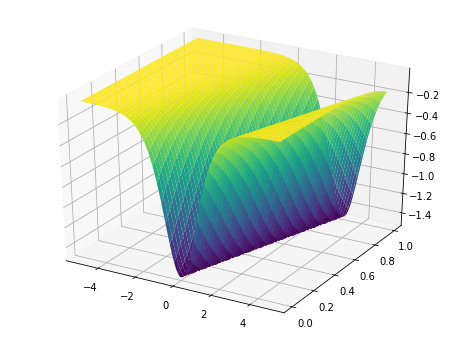

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

ax.plot_surface(XX, TT, -c/2* 1/(np.cosh( np.sqrt(c)/2*(XX - c*TT))**2), cmap="viridis")
plt.show()

(100, 100)
(100, 100)


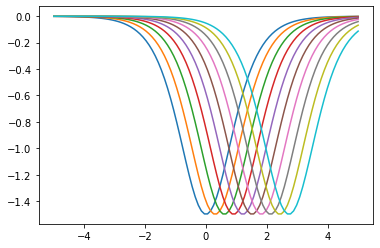

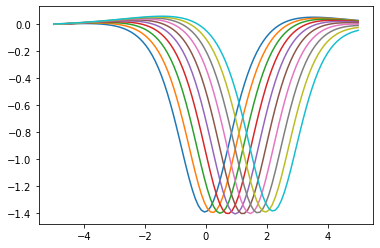

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
xx = np.linspace(-5,5,100)
tt = np.linspace(0,1,100)
cc=3
uu = -0.5*cc* 1/(np.cosh( 0.5*np.sqrt(cc)*(XX -cc*TT))**2)
uu_reshape = uu.reshape(100,100)

print(uu.shape)
print(uu_reshape.shape)

for k in range(0,100, 10):
  plt.plot(x_space, uu_reshape[k,:])
plt.show()

for k in range(0,100, 10):
  plt.plot(x_space, U_pred[k,:])
plt.show()

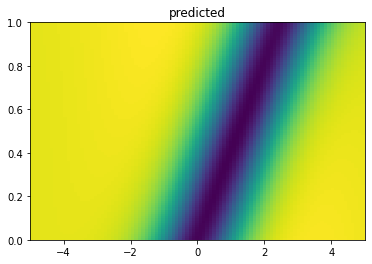

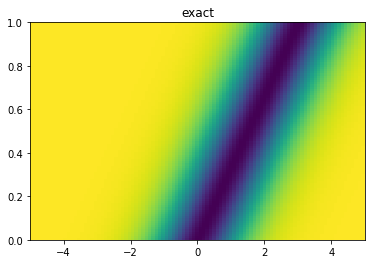

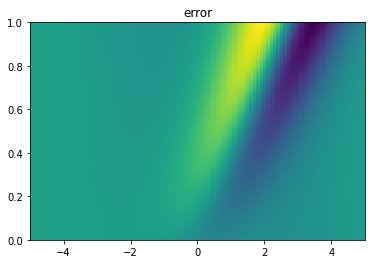

In [ ]:
plt.pcolor(XX, TT, U_pred)
plt.title("predicted")
plt.show()

plt.pcolor(XX, TT, uu_reshape)
plt.title("exact")
plt.show()

plt.pcolor(XX, TT, uu_reshape-U_pred)
plt.title("error")
plt.show()